## Semester 1 Project Submission

Please fill out:
* Student name: Thomas Ramsay
* Instructor name: Nick McCarty and Julian Ward


### Relevant Questions

* What defines success? Domestic Gross? Worldwide Gross? Box office? Want to define specific goal to attack.
* Hypothesis: Critic reviews are correlated with revenue.
* Which genres are most popular this year/last few years?
* Which actors are most popular?
* Do certain actors negate negative reviews?
[Study: How Critical Are Critical Reviews?
The Box Office Effects of Film
Critics, Star Power, and Budgets](https://repository.yu.edu/bitstream/handle/20.500.12202/6664/Ravid%20Basuory%20How%20Critical%20jmkg.67.4.103.18692.pdf?sequence=1&isAllowed=y)
* Are certain key words in a synopsis correlated with high revenue or good reviews?
* Which directors and writers are most popular?
* Which movie ratings earn the most revenue?
* In movies df, what does "popularity" mean? How is it measured?
* What does vote average and vote count mean?
* In movie ratings df, what does average rating mean? What does num votes mean? How is it different from df above? Is it different?
* Is there any possibility of endogeneity? For example, does an actor make a movie good, or does that actor just get picked for good movies?
* Time of year correlated with movie performance
* Holidays correlated with movie performance

More Relevant Papers:

[Study: A Machine Learning Approach to Predict Movie Box-Office Success](http://dspace.bracu.ac.bd/xmlui/bitstream/handle/10361/9015/13301028%2C13301019_CSE.pdf?sequence=1&isAllowed=y)

[Study: Predicting Movie Success with Machine Learning 
Techniques: Ways to Improve Accuracy](https://bura.brunel.ac.uk/bitstream/2438/18300/1/FullText.pdf)

[Study: A Predictor for Movie Success](http://cs229.stanford.edu/proj2013/EricsonGrodman-APredictorForMovieSuccess.pdf)

[New York Times Article](https://www.nytimes.com/2006/08/28/business/media/28cast.html)

# Data Exploration

## Data loading

In [1]:
! ls

CONTRIBUTING.md
Data Exploration.ipynb
LICENSE.md
README.md
awesome.gif
movie_data_erd.jpeg
zippedData


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 


![movie data erd](https://github.com/learn-co-curriculum/dsc-ai-academy-semester1-capstone/raw/main/movie_data_erd.jpeg)

In [3]:
# Connect imdb database
conn = sqlite3.connect('zippedData/im.db')

In [4]:
# use sql to pull in principals table
principals = pd.read_sql_query("SELECT * FROM principals", conn)
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [5]:
#persons table from sql
persons = pd.read_sql_query("SELECT * FROM persons", conn)
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [6]:
# look at the persons that have actor in their primary_profession
persons[persons['primary_profession'].str.contains('actor') == True]

,person_id,primary_name,birth_year,death_year,primary_profession
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
6,nm0063198,Bayou,NaN,NaN,actor
14,nm0066093,Ahmad Bedair,1945.0,NaN,"actor,miscellaneous"
15,nm0066163,Arnaud Bedouët,NaN,NaN,"actor,writer,director"
17,nm0066897,Mohammad-Ali Behboudi,1956.0,NaN,actor
...,...,...,...,...,...
606633,nm9985838,Anthony Simonetti,NaN,NaN,actor
606637,nm9989005,Jae-Hwan Kim,NaN,NaN,actor
606639,nm9989840,Mariya Shekaturova,NaN,NaN,actor
606641,nm9990047,Joseph Jackson,NaN,NaN,actor


In [7]:
#movie basics from sql
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
#find all of the different unique genres
unique_genres = movie_basics.genres.str.split(pat = ",", expand = True)
unique_genres = unique_genres.melt()
unique_genres = unique_genres.value.unique()
unique_genres

array(['Action', 'Biography', 'Drama', 'Comedy', 'Horror', 'Adventure',
       'Documentary', 'History', 'Animation', None, 'Crime', 'Sci-Fi',
       'Thriller', 'Fantasy', 'Mystery', 'Musical', 'Family', 'Western',
       'Romance', 'Sport', 'Adult', 'Music', 'News', 'Talk-Show',
       'Reality-TV', 'War', 'Game-Show', 'Short'], dtype=object)

In [9]:
# create a dataframe of all of the genres with repeating movies to represent movies as multiple genres

#define function that isolates all the movies that are a genre, then create a new column with the genre name
def genre_dataframe(genre):
    genre_dataframe = movie_basics[movie_basics['genres'].str.contains(genre) == True].copy()
    genre_dataframe['genre'] = genre
    return genre_dataframe

#empty dataframe
genres = pd.DataFrame()


#for loop that creates dataframes of all the movies that are each genre and concatenates them together, with repeating movies
for genre in unique_genres: 
    genre1 = genre_dataframe(str(genre))
    genres = pd.concat([genres, genre1], axis = 0)
    
genres.reset_index()    
genres.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action
20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Action
27,tt0276568,To Chase a Million,To Chase a Million,2018,97.0,"Action,Drama",Action
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",Action
38,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Action


In [10]:
#movie ratings from sql
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
# Read in CSV and TSV files
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
#check how many null values there are
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [13]:
#movie details
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movies = movies.drop('Unnamed: 0', axis = 1)
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
#movie budgets
movies_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
#check null values
movies_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [16]:
#movies info
movies_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t')
movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [17]:
#check null values
movies_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [18]:
#movie reviews
movies_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep = '\t', encoding='latin')
movies_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


# ANSWERING EXPLORATORY QUESTIONS:

## Data Visualization: Genres and Domestic Gross

In [19]:
# select specific columns and the join the movie_gross and genres dataframes

genres = genres[['primary_title', 'genre']]

domestic_gross = movie_gross[['title','domestic_gross', 'year']]

genres_gross = genres.merge(domestic_gross, how = 'left', left_on = 'primary_title', right_on = 'title')

genres_gross.head()

,primary_title,genre,title,domestic_gross,year
0,Sunghursh,Action,NaN,NaN,NaN
1,Foodfight!,Action,NaN,NaN,NaN
2,To Chase a Million,Action,NaN,NaN,NaN
3,Mortal Kombat,Action,NaN,NaN,NaN
4,Wazir,Action,Wazir,1100000.0,2016.0


In [20]:
#drop null values and isolate only the needed columns
genres_gross = genres_gross.dropna()
genres_gross = genres_gross[['genre', 'domestic_gross', 'year']]
genres_gross.head()

,genre,domestic_gross,year
4,Action,1100000.0,2016.0
6,Action,26300000.0,2014.0
7,Action,652300000.0,2015.0
8,Action,110800000.0,2015.0
9,Action,73100000.0,2012.0


In [21]:
#print the genres that have the most domestic gross revenue over the entire time period
top_genres = genres_gross[['genre', 'domestic_gross']].groupby(['genre']).mean()
top_genres.sort_values(by = 'domestic_gross', ascending = False)

,domestic_gross
genre,
Sci-Fi,1.083885e+08
Adventure,9.440941e+07
Animation,8.732619e+07
Action,5.841816e+07
Fantasy,5.277712e+07
Family,4.372936e+07
Sport,3.723851e+07
Comedy,3.378180e+07
Musical,2.899244e+07


In [22]:
#group by genre and year, used mean to control for number of movies released, could also use sum
new_genres_gross = genres_gross.groupby(['genre', 'year'], as_index = False)['domestic_gross'].mean()
new_genres_gross

,genre,year,domestic_gross
0,Action,2010.0,6.291758e+07
1,Action,2011.0,4.545733e+07
2,Action,2012.0,5.145065e+07
3,Action,2013.0,5.534061e+07
4,Action,2014.0,6.488705e+07
...,...,...,...
187,Western,2014.0,2.275000e+07
188,Western,2015.0,1.844433e+06
189,Western,2016.0,1.500000e+06
190,Western,2017.0,1.850000e+07


In [23]:
#create function to plot the genres and their domestic gross revenue
def plot_genres(name):
    all_genres = new_genres_gross[new_genres_gross['genre'] == name]
    plt.plot(all_genres.year, all_genres.domestic_gross, label = name)

In [24]:
#create list of top grossing genres to declutter the plot
top_genres_list = ['Adventure', 'Action', 'Comedy', 'Drama', 'Sci-Fi', 'Thriller', 'Animation', 'Crime', 'Fantasy', 'Sport']

In [59]:
new_genres_gross.describe()

,year,domestic_gross
count,192.000000,1.920000e+02
mean,2013.984375,3.899985e+07
std,2.579575,3.502490e+07
min,2010.000000,7.240000e+04
25%,2012.000000,1.669014e+07
50%,2014.000000,2.597797e+07
75%,2016.000000,5.042229e+07
max,2018.000000,1.836667e+08


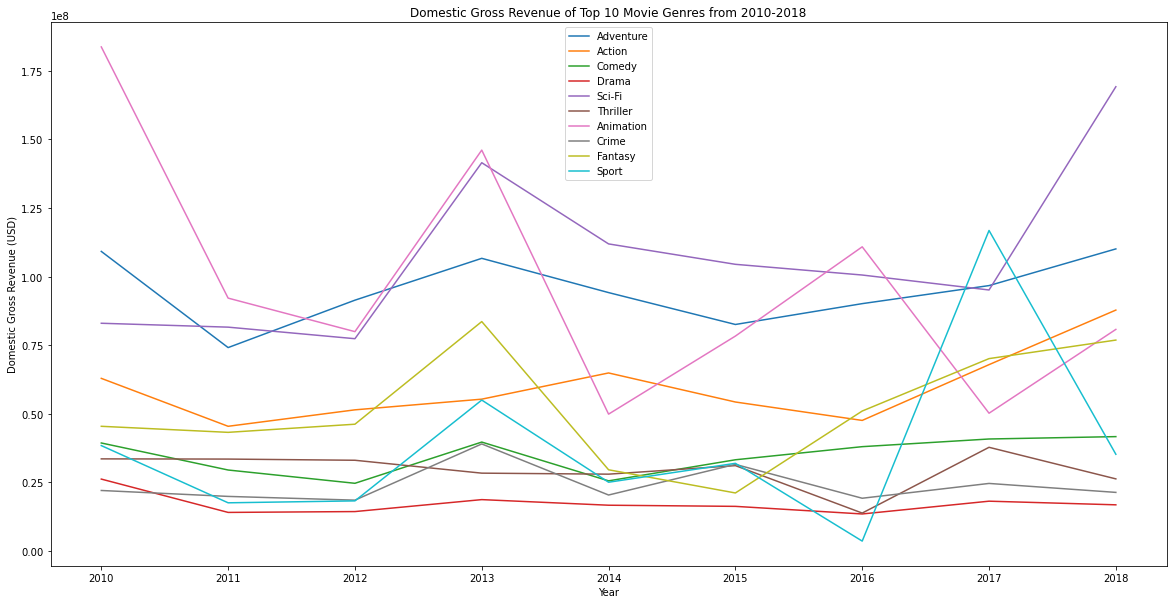

In [60]:
#create plot and call function to graph each of the top genres
plt.figure(figsize = (20,10))

for g in top_genres_list:
    plot_genres(g)

plt.title("Domestic Gross Revenue of Top 10 Movie Genres from 2010-2018")
plt.ylabel("Domestic Gross Revenue (USD)")
plt.xlabel('Year')

plt.legend()

plt.show()

## Data Visualization: Actors

## Is budget correlated with revenue?

In [26]:
movies_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']] = movies_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']].replace("[$,]", "", regex=True).astype(float)

In [27]:
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


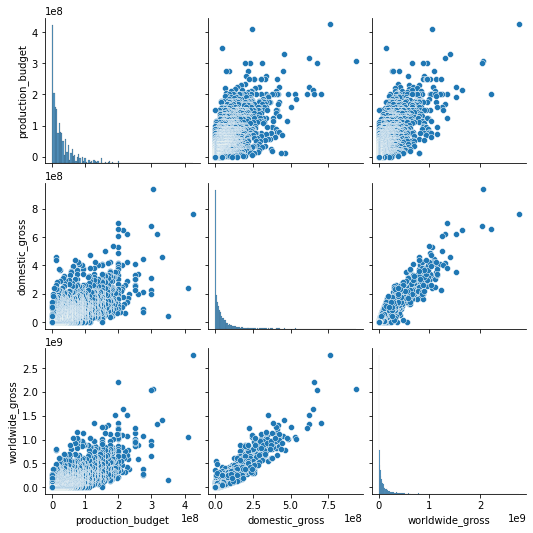

In [28]:
sns.pairplot(movies_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']])

Intuitively, we would assume there would be a positive correlation between production budget and revenue. Maybe it is worth doing a hypothesis test to see if the relationship is statistically significant. Given it would be a simple linear regression, we should consider possible omitted variables.

## Which release date months have the best revenue?

In [29]:
movies_budgets['release_date'] = pd.to_datetime(movies_budgets['release_date'])
movies_budgets['release_month'] = movies_budgets['release_date'].dt.month
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12


In [46]:
movies_budgets['release_date'].sort_values()

5677   1915-02-08
5523   1916-09-05
5614   1916-12-24
5683   1920-09-17
5606   1925-11-19
          ...    
2329   2019-12-31
3312   2019-12-31
535    2020-02-21
1205   2020-12-31
194    2020-12-31
Name: release_date, Length: 5782, dtype: datetime64[ns]

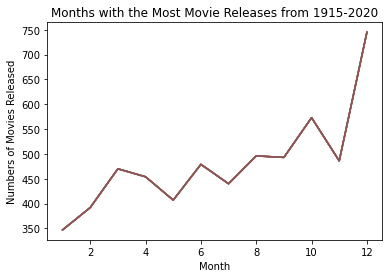

In [47]:
# months that have the most movie releases
months = [month for month, df in movies_budgets.groupby('release_month')]

plt.plot(months, movies_budgets.groupby(['release_month']).count())

plt.title("Months with the Most Movie Releases from 1915-2020")
plt.ylabel("Numbers of Movies Released")
plt.xlabel('Month')

plt.show()

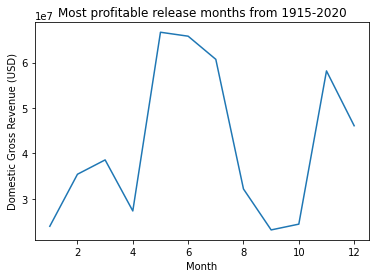

In [56]:
#use mean to control for number of movies released

plt.plot(months, movies_budgets.groupby(['release_month'])['domestic_gross'].mean())

plt.title("Most profitable release months from 1915-2020")
plt.ylabel("Domestic Gross Revenue (USD)")
plt.xlabel('Month')

plt.show()

## Which Genres are most often combined?

In [50]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [51]:
#from youtube
from itertools import combinations
from collections import Counter

count = Counter()

grouped_genres = movie_basics['genres']

grouped_genres = grouped_genres.dropna()

grouped_genres = grouped_genres.astype(str)

for row in grouped_genres:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
print('Most common combined genres:')
for key, value in count.most_common(20):
    print(key, value)

Most common combined genres:
('Comedy', 'Drama') 7732
('Biography', 'Documentary') 6734
('Drama', 'Romance') 5146
('Documentary', 'Drama') 4607
('Documentary', 'History') 4403
('Drama', 'Thriller') 3903
('Comedy', 'Romance') 3580
('Crime', 'Drama') 3345
('Action', 'Drama') 2932
('Horror', 'Thriller') 2810
('Documentary', 'Music') 2492
('Drama', 'Family') 2345
('Biography', 'Drama') 2151
('Drama', 'Mystery') 2006
('Documentary', 'Family') 1976
('Action', 'Comedy') 1859
('Adventure', 'Documentary') 1839
('Action', 'Adventure') 1705
('Action', 'Crime') 1670
('Drama', 'Horror') 1604


## Correlation between rating and revenue?

In [62]:
movies_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [63]:
movies_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64